In [1]:
#Figure 1A and 1B
#Introduce noise to both phi and lambda. loop: {i_phi_sigma, i_l_sigma, i_rho}. m=12*i_phi_sigma+ 3* i_l_sigma+ i_rho;

#Manipulate the raw data with the explanatory data analysis
#invite people for the Kaggle party
#%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

DELTA=10**(-6);


In [2]:
def Integration( x ,y):
    integration=0;
    for i in range( len(x)- 1):  # 0, 1, 2, n-2
        integration= integration+ ( y[i]+ y[i+1] )* (x[i+1]- x[i] )/2;
    return integration

In [3]:
files=["collected_experimental_x.csv", "collected_randomized_x.csv", "collected_experimental_y.csv", "collected_randomized_y.csv"]
cor_lens=[]
for file in files:
    cor_lens.append( [] )
    data= pd.read_csv("~/correlated_percolation/JoeRawData/correlation_function/"+ file)
    for i in range(1, len(data.columns ) ):
        cor_lens[-1].append( Integration( data.iloc[:, 0][ data.distance_micron<=20], data.iloc[:, i][ data.distance_micron<=20] ) )
       

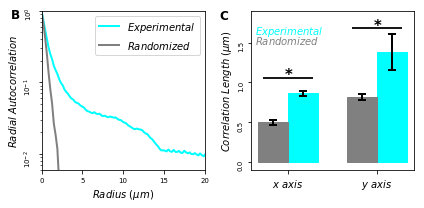

In [7]:
#Latest data Joe sent to us. experimental: 3 curves; random 9 biofilms.
#figure 1: Radial Antocorrelation as a function of radius.
fig=plt.figure( figsize=(6, 3) );
ax1= plt.subplot(1, 2, 1);
#How sigma recover the distribution
colors=[
    [0, 1, 1],
    [0.5, 0.5, 0.5],
    ];

#35 by 230
import numpy as np    
import matplotlib.pyplot as plt  
from matplotlib.animation import FuncAnimation 
from matplotlib import cm
from numpy.random import randn

#fig 1c
radius=np.loadtxt("/home/xiaoling/correlated_percolation/JoeRawData/small_set_of_first_stuff/radius_micron.txt"); 
corr_exp=np.loadtxt("/home/xiaoling/correlated_percolation/JoeRawData/small_set_of_first_stuff/experimental_correlation.txt");
corr_random=np.loadtxt("/home/xiaoling/correlated_percolation/JoeRawData/small_set_of_first_stuff/randomized_correlation.txt"); 
i=0;
plt.semilogy(radius, corr_exp, linestyle='-', linewidth=2, color=colors[i], label=r"$Experimental$" );
i=1;
plt.semilogy(radius, corr_random, linestyle='-', linewidth=2, color=colors[i], label=r"$Randomized$" );

#plt.plot([0.45, 0.45], [0, 1], color='k', linewidth=2, linestyle='--')
plt.xlabel(r'$Radius\ (\mu m)$', fontsize=10)
plt.ylabel(R'$Radial\ Autocorrelation$', fontsize=10)
#plt.title(r"$35\ by\ 230$")
plt.legend()

plt.xticks(fontsize=7 );
plt.yticks(rotation=90, fontsize=7 );
plt.ylim([0.006, 1])
plt.xlim( [0, 20] )
#plt.title("Xiaoling's practice", fontsize=18)
#plt.legend([line1, line2], ['ex1','ex2'])

#plt.savefig("plot_2curves.eps", dpi=300)

#blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          #markersize=15, label='Blue stars')
#plt.legend(handles=[blue_line])

plt.text(-3.8, 0.79, 'B', fontsize=12, fontweight='bold');
#plt.text()
#plt.xticks([0.32, 0.41, 0.5, 0.6],['0.32', r'$p_c$',  '0.5','0.6'], rotation=90)
#plt.text(phis[phis==0.32]-0.005, period[0, phis==0.32]-10, 'B', fontsize=14, fontweight='bold')
#plt.xticks([0.32, 0.41, 0.5, 0.6],['0.32', r'$p_c$',  '0.5','0.6'], rotation=90)
#plt.text(20, 0.00001, r'$\tau=1.81$', fontsize=14, fontweight='bold')

#**************************************
ax2=plt.subplot(1, 2, 2);
h_x_e=np.mean( cor_lens[0] );
h_x_r=np.mean( cor_lens[1] );

h_y_e= np.mean( cor_lens[2] );
h_y_r= np.mean( cor_lens[3] );

d_x_e= np.std( cor_lens[0] )/np.sqrt( len(cor_lens[0]) );  #standard error
d_x_r= np.std( cor_lens[1] ) /np.sqrt( len(cor_lens[1]) ); #standard error

d_y_e= np.std( cor_lens[2] ) /np.sqrt( len(cor_lens[2]) ); #standard error
d_y_r= np.std( cor_lens[3] ) /np.sqrt( len(cor_lens[3]) ); #standard error


x_e=[[2, 3, 3, 2], [0,0, h_x_e, h_x_e]];
x_r=[[1, 2, 2, 1], [0,0, h_x_r, h_x_r]];
y_e=[[5, 6, 6, 5], [0,0, h_y_e, h_y_e]];
y_r=[[4, 5, 5, 4], [0,0, h_y_r, h_y_r]];

plt.fill(x_e[0],x_e[1], color=[0, 1, 1]);
plt.fill(x_r[0],x_r[1], color=[0.5, 0.5, 0.5]);
plt.fill(y_e[0],y_e[1], color=[0, 1, 1]);
plt.fill(y_r[0],y_r[1], color=[0.5, 0.5, 0.5]);

#Start to plot the error bar
delta=0.1;
X_x_e=[ [ 2.5- delta, 2.5+ delta], [ 2.5- delta, 2.5+ delta], [2.5, 2.5]  ];
Y_x_e=[[h_x_e- d_x_e, h_x_e- d_x_e ], [ h_x_e+ d_x_e, h_x_e+ d_x_e], [ h_x_e- d_x_e, h_x_e+ d_x_e] ];

X_x_r=[ [ 1.5- delta, 1.5+ delta], [ 1.5- delta, 1.5+ delta], [1.5, 1.5]  ];
Y_x_r=[[h_x_r- d_x_r, h_x_r- d_x_r ], [ h_x_r+ d_x_r, h_x_r+ d_x_r], [ h_x_r- d_x_r, h_x_r+ d_x_r] ];

X_y_e=[ [ 5.5- delta, 5.5+ delta], [ 5.5- delta, 5.5+ delta], [5.5, 5.5]  ];
Y_y_e=[[h_y_e- d_y_e, h_y_e- d_y_e ], [ h_y_e+ d_y_e, h_y_e+ d_y_e], [ h_y_e- d_y_e, h_y_e+ d_y_e] ];

X_y_r=[ [ 4.5- delta, 4.5+ delta], [ 4.5- delta, 4.5+ delta], [4.5, 4.5]  ];
Y_y_r=[[h_y_r- d_y_r, h_y_r- d_y_r ], [ h_y_r+ d_y_r, h_y_r+ d_y_r], [ h_y_r- d_y_r, h_y_r+ d_y_r] ];

for i in range(3):
    plt.plot( X_x_e[i], Y_x_e[i], color=[0,0,0], linewidth=2);
    plt.plot( X_x_r[i], Y_x_r[i], color=[0,0,0], linewidth=2);
    plt.plot( X_y_e[i], Y_y_e[i], color=[0,0,0], linewidth=2);
    plt.plot( X_y_r[i], Y_y_r[i], color=[0,0,0], linewidth=2);

#frame=[ [4.2, 4.2, 5.8, 5.8], [h_y_r, h_y_e+ 0.2, h_y_e+0.2, h_y_e]];
frame=[ [ 4.2, 5.8], [ h_y_e+ 0.3, h_y_e+0.3]];
plt.plot( frame[0], frame[1],  color=[0.1,0.1,0.1], linewidth=2 )

#frame=[ [1.2, 1.2, 2.8, 2.8], [h_x_r, h_x_e+ 0.2, h_x_e+0.2, h_x_e]];
frame=[ [ 1.2, 2.8], [ h_x_e+ 0.2, h_x_e+0.2]];
plt.plot( frame[0], frame[1],  color=[0.1,0.1,0.1], linewidth=2 )

plt.text(0.9, 1.6, r'$Experimental$', fontsize=10,  color=[0, 1, 1]);
plt.text(0.9, 1.48, r'$Randomized$', fontsize=10, color=[0.5, 0.5, 0.5]);
plt.text(4.9, h_y_e+ 0.28, '*', fontsize=15, fontweight='bold',  color=[0, 0, 0]);
plt.text(1.9, h_x_e+ 0.18, '*', fontsize=15, fontweight='bold',  color=[0, 0, 0]);

plt.ylabel(r"$Correlation\ Length\ (\mu m)$", fontsize=10);
plt.xticks([2, 5], [r"$x\ axis$",r"$y\ axis$"], fontsize=10)
plt.yticks(rotation=90, fontsize=7 );


#plt.yticks(rotation=90, fontsize=7 );
plt.ylim([-0.1, 1.9])
#plt.title("Xiaoling's practice", fontsize=18)
#plt.legend([line1, line2], ['ex1','ex2'])

#plt.savefig("plot_2curves.eps", dpi=300)

#blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          #markersize=15, label='Blue stars')
#plt.legend(handles=[blue_line])

plt.text(-0.3, 1.8, 'C', fontsize=12, fontweight='bold');
plt.tight_layout()

#plt.savefig("/home/xiaoling/correlated_percolation/figures/CorFun_CorLen_Fig1_v11.pdf", format='pdf');
#plt.savefig("/home/xiaoling/correlated_percolation/figures/CorFun_CorLen_Fig1_v11.png", dpi=600, format='png');
plt.show()

In [9]:
#Calculate the significance
h_x_e=np.mean( cor_lens[0] );
h_x_r=np.mean( cor_lens[1] );

h_y_e= np.mean( cor_lens[2] );
h_y_r= np.mean( cor_lens[3] );

d_x_e= np.std( cor_lens[0] )#/np.sqrt( len(cor_lens[0]) );
d_x_r= np.std( cor_lens[1] )#/np.sqrt( len(cor_lens[1]) );

d_y_e= np.std( cor_lens[2] )#/np.sqrt( len(cor_lens[2]) );
d_y_r= np.std( cor_lens[3] )#/np.sqrt( len(cor_lens[3]) );

from scipy.special import erf;
import numpy as np;

#in the axis x
mean_rad= h_x_r;
sigma2_rad= d_x_r**2;   #sample variance divided by sample size

mean_exp=h_x_e;
sigma2_exp= d_x_e**2;
#define z= mean_rad- mean_exp: P(z>0)
u_z= mean_rad- mean_exp
sigma2_z= sigma2_rad+ sigma2_exp
sigma_z= np.sqrt( sigma2_z)
pz_larger_0= 1/2- 1/2*erf( -u_z/( np.sqrt(2) *sigma_z )  )
print(pz_larger_0)


#in the axis y
mean_rad= h_y_r;
sigma2_rad= d_y_r**2;   #sample variance divided by sample size

mean_exp=h_y_e;
sigma2_exp= d_y_e**2;
#define z= mean_rad- mean_exp: P(z>0)
u_z= mean_rad- mean_exp
sigma2_z= sigma2_rad+ sigma2_exp
sigma_z= np.sqrt( sigma2_z)
pz_larger_0= 1/2- 1/2*erf( -u_z/( np.sqrt(2) *sigma_z )  )
print(pz_larger_0)

5.4037308682808316e-05
0.08429280504947828


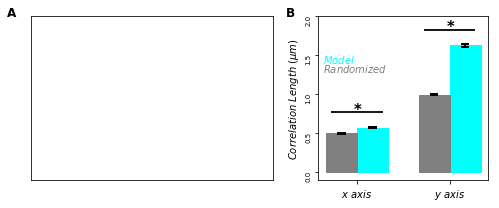

In [20]:
#figure 3B: banlanced growth rate. correlation length in both x and y axis
def Integration( y, dx):
    return sum(y)*dx- (y[0]+y[-1])/2*dx;

fig=plt.figure( figsize=(7, 3) );  # (width, height)
ax1= plt.subplot2grid( (1, 7), (0,0), colspan= 4);
plt.text(-0.1, 1.0, 'A', fontsize=12, fontweight='bold');
plt.xticks([])
plt.yticks([] )


ax2= plt.subplot2grid( (1, 7), (0,4), colspan= 3);
# Use the new data: 35 by 230 biofilm, new defined rho=p(on|on)- p(on|off).

files=["Bio6.1_CF_x_r3000_Rho38Sigma"+"{:.6f}_11.dat", "Bio6.1_CF_x_r3000_Rho38Sigma"+"{:.6f}_rand.dat", "Bio6.1_CF_y_r3000_Rho38Sigma"+"{:.6f}_11.dat", "Bio6.1_CF_y_r3000_Rho38Sigma"+"{:.6f}_rand.dat"]
sigmas=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
deltas=[1, 1, 2, 2]
CLs= np.zeros( (4, 10) )
for ifile in range( len(files) ):
    for isigma in range( len(sigmas) ):
        file= files[ifile]
        sigma= sigmas[isigma]
        covariance= np.loadtxt( "/home/xiaoling/correlated_percolation/data/"+ file.format(sigma) );   
        covariance= np.mean( covariance, 0)    
        covariance= covariance/ covariance[0]  #normalize    
        CLs[ifile, isigma]= Integration( covariance, deltas[ifile] )


h_x_e=np.mean( CLs[0, :] );
h_x_r=np.mean( CLs[1, :] )
h_y_e= np.mean( CLs[2, :] );
h_y_r= np.mean( CLs[3, :] );

d_x_e= np.std( CLs[0, :] )/np.sqrt( len(CLs[0, :]) )
d_x_r= np.std( CLs[1, :] )/np.sqrt( len(CLs[1, :]) )
d_y_e= np.std( CLs[2, :] )/np.sqrt( len(CLs[2, :]) )
d_y_r= np.std( CLs[3, :] )/np.sqrt( len(CLs[3, :]) )


x_e=[[2, 3, 3, 2], [0,0, h_x_e, h_x_e]];
x_r=[[1, 2, 2, 1], [0,0, h_x_r, h_x_r]];
y_e=[[5, 6, 6, 5], [0,0, h_y_e, h_y_e]];
y_r=[[4, 5, 5, 4], [0,0, h_y_r, h_y_r]];

plt.fill(x_e[0],x_e[1], color=[0, 1, 1]);
plt.fill(x_r[0],x_r[1], color=[0.5, 0.5, 0.5]);
plt.fill(y_e[0],y_e[1], color=[0, 1, 1]);
plt.fill(y_r[0],y_r[1], color=[0.5, 0.5, 0.5]);

#Start to plot the error bar
delta=0.1;
X_x_e=[ [ 2.5- delta, 2.5+ delta], [ 2.5- delta, 2.5+ delta], [2.5, 2.5]  ];
Y_x_e=[[h_x_e- d_x_e, h_x_e- d_x_e ], [ h_x_e+ d_x_e, h_x_e+ d_x_e], [ h_x_e- d_x_e, h_x_e+ d_x_e] ];

X_x_r=[ [ 1.5- delta, 1.5+ delta], [ 1.5- delta, 1.5+ delta], [1.5, 1.5]  ];
Y_x_r=[[h_x_r- d_x_r, h_x_r- d_x_r ], [ h_x_r+ d_x_r, h_x_r+ d_x_r], [ h_x_r- d_x_r, h_x_r+ d_x_r] ];

X_y_e=[ [ 5.5- delta, 5.5+ delta], [ 5.5- delta, 5.5+ delta], [5.5, 5.5]  ];
Y_y_e=[[h_y_e- d_y_e, h_y_e- d_y_e ], [ h_y_e+ d_y_e, h_y_e+ d_y_e], [ h_y_e- d_y_e, h_y_e+ d_y_e] ];

X_y_r=[ [ 4.5- delta, 4.5+ delta], [ 4.5- delta, 4.5+ delta], [4.5, 4.5]  ];
Y_y_r=[[h_y_r- d_y_r, h_y_r- d_y_r ], [ h_y_r+ d_y_r, h_y_r+ d_y_r], [ h_y_r- d_y_r, h_y_r+ d_y_r] ];

for i in range(3):
    plt.plot( X_x_e[i], Y_x_e[i], color=[0,0,0], linewidth=2);
    plt.plot( X_x_r[i], Y_x_r[i], color=[0,0,0], linewidth=2);
    plt.plot( X_y_e[i], Y_y_e[i], color=[0,0,0], linewidth=2);
    plt.plot( X_y_r[i], Y_y_r[i], color=[0,0,0], linewidth=2);

#frame=[ [4.2, 4.2, 5.8, 5.8], [h_y_r, h_y_e+ 0.2, h_y_e+0.2, h_y_e]];
frame=[ [4.2, 5.8], [ h_y_e+ 0.2, h_y_e+0.2]];
plt.plot( frame[0], frame[1],  color=[0.1,0.1,0.1], linewidth=2 )

#frame=[ [1.2, 1.2, 2.8, 2.8], [h_x_r, h_x_e+ 0.2, h_x_e+0.2, h_x_e]];
frame=[ [1.2, 2.8], [ h_x_e+ 0.2, h_x_e+0.2]];
plt.plot( frame[0], frame[1],  color=[0.1,0.1,0.1], linewidth=2 )

plt.text(0.9, 1.4, r'$Model$', fontsize=10,  color=[0, 1, 1]);
plt.text(0.9, 1.28, r'$Randomized$', fontsize=10, color=[0.5, 0.5, 0.5]);
plt.text(4.9, h_y_e+ 0.18, '*', fontsize=15, fontweight='bold',  color=[0, 0, 0]);
plt.text(1.9, h_x_e+ 0.18, '*', fontsize=15, fontweight='bold',  color=[0, 0, 0]);

plt.ylabel(r"$Correlation\ Length\ (\mu m)$", fontsize=10);
plt.xticks([2, 5], [r"$x\ axis$",r"$y\ axis$"], fontsize=10)
plt.yticks(rotation=90, fontsize=7 );


#plt.yticks(rotation=90, fontsize=7 );
plt.ylim([-0.1, 2.0])
#plt.title("Xiaoling's practice", fontsize=18)
#plt.legend([line1, line2], ['ex1','ex2'])

#plt.savefig("plot_2curves.eps", dpi=300)

#blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          #markersize=15, label='Blue stars')
#plt.legend(handles=[blue_line])

plt.text(-0.3, 2.0, 'B', fontsize=12, fontweight='bold');

plt.tight_layout()

#plt.savefig("/home/xiaoling/correlated_percolation/figures/CorLen_Sim_Fig3_v11.pdf", format='pdf');
#plt.savefig("/home/xiaoling/correlated_percolation/figures/CorLen_Sim_Fig3_v11.png", dpi=600, format='png');
plt.show()

In [21]:
#in the axis x
mean_rad= h_x_r;
sigma2_rad= d_x_r**2;   #sample variance divided by sample size: the variance of u_rand~N(mean, sigma2_rand)

mean_exp=h_x_e;
sigma2_exp= d_x_e**2;
#define z= mean_rad- mean_exp: P(z>0)
u_z= mean_rad- mean_exp
sigma2_z= sigma2_rad+ sigma2_exp
sigma_z= np.sqrt( sigma2_z)
pz_larger_0= 1/2- 1/2*erf( -u_z/( np.sqrt(2) *sigma_z )  )
print(pz_larger_0)


#in the axis y
mean_rad= h_y_r;
sigma2_rad= d_y_r**2;   #sample variance divided by sample size: the variance of u_rand~N(mean, sigma2_rand)

mean_exp=h_y_e;
sigma2_exp= d_y_e**2;
#define z= mean_rad- mean_exp: P(z>0)
u_z= mean_rad- mean_exp
sigma2_z= sigma2_rad+ sigma2_exp
sigma_z= np.sqrt( sigma2_z)
pz_larger_0= 1/2- 1/2*erf( -u_z/( np.sqrt(2) *sigma_z )  )
print(pz_larger_0)

0.0
0.0


In [23]:
gammas=[0.8]
sigmas=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
phi_sample=[]
rho_sample=[]
phis=[[0]*len(sigmas)  for _ in gammas]
phis_sigma= [[0]*len(sigmas)  for _ in gammas]
rhos= [[0]*len(sigmas)  for _ in gammas]
rhos_sigma= [[0]*len(sigmas)  for _ in gammas]
for igamma in range( len(gammas) ):
    for isigma in range( len(sigmas) ):
        phi_rho= np.loadtxt("../data/Bio6.1_PhiRho_S" +str(int(sigmas[isigma]*10) )+ "_G"+ str( int(gammas[igamma]*10) ) +"_R100Phi43Rho38_11.dat")
        phi_sample= phi_sample+ list( phi_rho[:, 0] )
        rho_sample= rho_sample+ list( phi_rho[:, 1] )
        phis[igamma][isigma]= np.mean( phi_rho[:, 0] )
        phis_sigma[igamma][isigma]= np.std( phi_rho[:, 0] )
        rhos[igamma][isigma]= np.mean( phi_rho[:, 1] )
        rhos_sigma[igamma][isigma]= np.std( phi_rho[:, 1] )

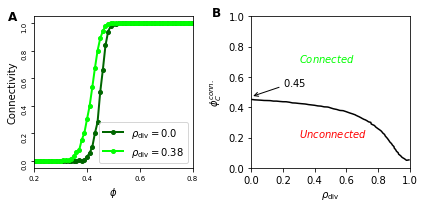

In [27]:
#figure 4
fig=plt.figure( figsize=(6, 3) );
ax1= plt.subplot(1, 2, 1);
#How sigma recover the distribution
colors=[
    [0, 0.4, 0],
    [0, 1, 0]];

#35 by 230
import numpy as np    
import matplotlib.pyplot as plt  
from matplotlib.animation import FuncAnimation 
from matplotlib import cm
from numpy.random import randn

#phis=np.array([0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8])


phis=np.arange(0, 100.5, 1)/100
rhos=[0, 0.38];
rhos=np.array(rhos);
for irho in range( len(rhos) ):
    rho=rhos[irho];    
    connection=np.loadtxt("/home/xiaoling/correlated_percolation/data/Bio9_Con-Phi_Rho"+ 
                          str( int( rho*100+0.5) ) +"_TH35W230_Fig4A.dat" );    
    plt.plot(phis, connection, linestyle='-', linewidth=2, color=colors[irho], marker='o', markerfacecolor=colors[irho], 
             markeredgecolor=colors[irho], markersize=4, label=r"$\rho_{\rm div}=$"+str( rhos[irho ] ) );

#plt.plot([0.45, 0.45], [0, 1], color='k', linewidth=2, linestyle='--')
plt.xlabel(r'$\phi$', fontsize=10)
plt.ylabel('Connectivity', fontsize=10)
plt.xlim( [0.2, 0.8] )
#plt.title(r"$35\ by\ 230$")
plt.legend()

plt.xticks(fontsize=7 );
plt.yticks(rotation=90, fontsize=7 );
#plt.ylim([1.4, 2.5])
#plt.title("Xiaoling's practice", fontsize=18)
#plt.legend([line1, line2], ['ex1','ex2'])

#plt.savefig("plot_2curves.eps", dpi=300)

#blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          #markersize=15, label='Blue stars')
#plt.legend(handles=[blue_line])

plt.text(0.1, 1.02, 'A', fontsize=12, fontweight='bold');
#plt.text()
#plt.xticks([0.32, 0.41, 0.5, 0.6],['0.32', r'$p_c$',  '0.5','0.6'], rotation=90)
#plt.text(phis[phis==0.32]-0.005, period[0, phis==0.32]-10, 'B', fontsize=14, fontweight='bold')
#plt.xticks([0.32, 0.41, 0.5, 0.6],['0.32', r'$p_c$',  '0.5','0.6'], rotation=90)
#plt.text(20, 0.00001, r'$\tau=1.81$', fontsize=14, fontweight='bold')

#**************************************
ax2=plt.subplot(1, 2, 2);
# Use the new data: 35 by 230 biofilm, new defined rho=p(on|on)- p(on|off).
connectivity=[];
rhos=np.arange(0, 1+ DELTA, 0.02);
phis=np.arange(0, 0.5+ DELTA, 0.01);

Rhos, Phis= np.meshgrid(rhos, phis)
for rho in rhos:
    temp=np.loadtxt("/home/xiaoling/correlated_percolation/data/Bio9_Con-Phi_Rho"+ str( int( rho*100+0.5) ) +
                    "_TH35W230_Fig4B.dat");
    connectivity.append(temp);
connectivity=np.array(connectivity);
connectivity=np.transpose(connectivity);
#If array-like, draw contour lines at the specified levels. The values must be in increasing order.
CS = ax2.contour(Rhos, Phis, connectivity, levels=[0.5], colors='k');
plt.ylim([0,1]);
plt.text(0.3, 0.2, r'$Unconnected$', fontsize=10, color='r');
plt.text(0.3, 0.7, r'$Connected$', fontsize=10, color=[0,1,0]);

plt.xlabel(r'$\rho_{\rm div}$', fontsize=10)
plt.ylabel(r'$\phi_C^{conn.}$', fontsize=10)

plt.text(-0.25, 1, 'B', fontsize=12, fontweight='bold');
plt.annotate(r'$0.45$', xy=(0, 0.47), xytext=(0.2, 0.54), arrowprops=dict(arrowstyle='->', facecolor='black'), fontsize=10 )

plt.tight_layout()

#plt.savefig("/home/xiaoling/correlated_percolation/figures/Clu_PN_WT_Fig4_v10.pdf", format='pdf');
#plt.savefig("/home/xiaoling/correlated_percolation/figures/Clu_PN_WT_Fig4_v10.png", dpi=500)
plt.show()

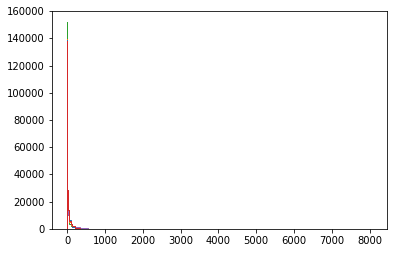

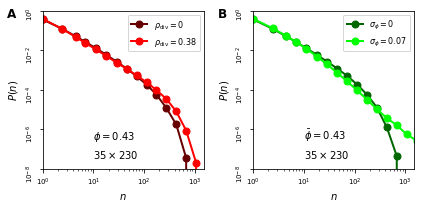

In [28]:
#Figure 5
height=35;
width=230;
repeats=1000;
NMax=height*width;
PMin=10^(-12);
numbins=5*int(np.log10(NMax)+0.5);
nedges = [ int(x+0.5) for x in np.logspace( np.log10(1),np.log10(NMax),numbins+1) ];
nedges=np.array( sorted( list( set(nedges) ) ) );
nwidths= nedges[1: ]- nedges[0: -1];
nwidths=np.array(nwidths);
ncenters=10**( ( np.log10(nedges[0: -1])+ np.log10( nedges[1: ]-1 ) )/2 );

phis=[0.43];
phi_sigmas=[0, 0.03, 0.07]
cluster_sizes=[];
#Read the data for 4B. sigma=0, 0.03, 0.07, rho=0
for phi in phis:
    for phi_sigma in phi_sigmas:
        rho=0
        cluster_sizes.append( np.loadtxt('/home/xiaoling/correlated_percolation/data/Fra11_1PhiM'+str( int( phi*10000+0.5) )+'Sig'+ str(int (phi_sigma*1000) )+ 'Rho' +str( int( rho*100+0.5) )+ 'TH35W230_Clu.dat') ); 
pns_4B, bins, patches= plt.hist(cluster_sizes, bins= nedges, histtype= 'step');
for i in range(len(pns_4B) ):
    pns_4B[i]= pns_4B[i]/nwidths/ ( sum( pns_4B[i] ) );
    
#Read the data for 4A. sigma=0, 0.03, 0.07, rho=0
cluster_sizes=[];
rhos=[0, 0.38];
for rho in rhos:
    phi=0.43
    cluster_sizes.append( np.loadtxt('/home/xiaoling/correlated_percolation/data/Bio9_Clu_Phi'+str( int( phi*100+0.5) )+'Rho'+ str(int ( rho*100+ 0.5) )+  '_TH35W230.dat') ); 
pns_4A, bins, patches= plt.hist(cluster_sizes, bins= nedges, histtype= 'step');

for i in range(len(pns_4A) ):
    pns_4A[i]= pns_4A[i]/nwidths/ ( sum( pns_4A[i] ) );

#V13. In B, change σ to σc in legend and remove σφ = 0:03 curve.
#****************************************************
fig=plt.figure( figsize=(6, 3) );
bar=[2, 3, 4, 5, 6]
ax3=plt.subplot(1, 2, 1)

colors=[
    [0.4, 0, 0],
    [1, 0, 0],
    ];      #magenta 

labels=[r'$\rho_{\rm div}=0$', r'$\rho_{\rm div}=0.38$']
#plt.loglog(ncenters, pns_Exp_trkA, linestyle='-', color=colors[i], linewidth=2, marker='o', markerfacecolor=colors[i], markeredgecolor=colors[i], markersize=7, label='WT');
for i in [0,  1]:
    plt.loglog(ncenters, pns_4A[i], linestyle='-', color=colors[i], 
    linewidth=2, marker='o', markerfacecolor=colors[i], markeredgecolor=colors[i], 
    markersize=7, label=labels[i]);

        
#plt.loglog(ncenters[bar], 0.3*ncenters[bar]**(-1.81), linestyle='-', color=[0,0,1], linewidth=3);
#plt.text(2, 0.0006, r'$\tau=1.81$', fontsize=10, fontweight='bold', color=[0,0,1])

plt.legend(loc="upper right",fontsize=8);
plt.text(10, 10**(-6.5), r'$\phi=0.43$', fontsize=10);
plt.text(10, 10**(-7.5), r'$35\times 230$', fontsize=10);
plt.xlim([1, 1500]);
plt.ylim([10**(-8), 1])
plt.xticks(fontsize=7 );
plt.yticks(rotation=90, fontsize=7 );
plt.xlabel(r'$n$', fontsize=10);
plt.ylabel(r'$P(n)$', fontsize=10);
plt.text(0.2, 0.5, 'A', fontsize=12, fontweight='bold');





#****************************************************
colors=[
    [0, 0.4, 0],
    [0, 0.7, 0],
    [0, 1, 0], #green
    ];      #magenta 

ax4=plt.subplot(1, 2, 2)
labels=[r'$\sigma_{\phi}=0$',r'$\sigma_{\phi}=0.03$', r'$\sigma_{\phi}=0.07$']
#plt.loglog(ncenters, pns_Exp_trkA, linestyle='-', color=colors[i], linewidth=2, marker='o', markerfacecolor=colors[i], markeredgecolor=colors[i], markersize=7, label='WT');
for i in [0, 2]:
    plt.loglog(ncenters, pns_4B[i], linestyle='-', color=colors[i], linewidth=2, marker='o', markerfacecolor=colors[i], markeredgecolor=colors[i], markersize=7, label=labels[i]);
#plt.loglog(ncenters[ bar], 0.3*ncenters[bar]**(-1.81), linestyle='-', color=[0, 0, 1], linewidth=3);
#plt.text(2, 0.0006, r'$\tau=1.81$', fontsize=10, fontweight='bold', color=[0, 0, 1]);

plt.legend(loc="upper right",fontsize=8);

plt.text(10, 10**(-6.5), r'$\bar{\phi} =0.43$', fontsize=10);
plt.text(10, 10**(-7.5), r'$35\times 230$', fontsize=10);

plt.xlim([1, 1500]);
plt.ylim([10**(-8), 1])
plt.xticks(fontsize=7 );
plt.yticks(rotation=90, fontsize=7 );
plt.xlabel(r'$n$', fontsize=10);
plt.ylabel(r'$P(n)$', fontsize=10);
plt.text(0.2, 0.5, 'B', fontsize=12, fontweight='bold');
plt.tight_layout()


#********************************

#colors=[
    #[0.4, 0, 0],
    #[0.7, 0, 0],
    #[1, 0, 0],
    #[0, 1, 0],
    #[0, 1, 1],
    #[0.1, 0.1, 0.1]];
#ax31= fig.add_axes([0.15, 0.26, .13, .26], facecolor=[0.8, 0.8, 0.8])

#indexs=[1,2,3]
#for i in [0,  1]:
    #ax31.plot(ncenters[ indexs ], pns_4A[i][indexs], linestyle='-', color=colors[i], linewidth=1, marker='o', markerfacecolor=colors[i], markeredgecolor=colors[i], markersize=4);
##ax31.set_xticks([1], True );
##ax31.set_yticks([0.2], True );
#plt.xticks(fontsize=7 );
#plt.yticks(fontsize=7 , rotation=90);

#plt.xticks([1], (r'$10^{0}$'), fontsize=7 );
#plt.yticks( [0.2], (r'$2 \time 10^{-1}$'), rotation=90, fontsize=7 );

#plt.xticks([])
#plt.yticks([])

#fig, ax1 = plt.subplots()
# These are in unitless percentages of the figure size. (0,0 is bottom left)
#left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
#ax2 = fig.add_axes([left, bottom, width, height])
#ax1.plot(range(10), color='red')
#ax2.plot(range(6)[::-1], color='green')
#plt.savefig("/home/xiaoling/correlated_percolation/figures/Clu_PN_WT_Fig4_v1.eps", format='eps');
#plt.savefig("/home/xiaoling/correlated_percolation/figures/Clu_PN_WT_Fig5_v13_3.pdf", format='pdf');
#plt.savefig("/home/xiaoling/correlated_percolation/figures/Clu_PN_WT_Fig5_v13_3.png", dpi=500)
plt.show()


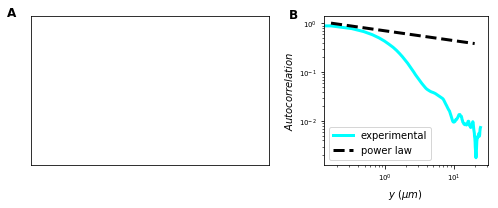

In [29]:
#Figure 6
fig=plt.figure( figsize=(7, 3) );  # (width, height)
ax1= plt.subplot2grid( (1, 7), (0,0), colspan= 4);
plt.text(-0.1, 1.0, 'A', fontsize=12, fontweight='bold');
plt.xticks([])
plt.yticks([] )


ax2= plt.subplot2grid( (1, 7), (0,4), colspan= 3);

file_handler = open("/home/xiaoling/correlated_percolation/JoeRawData/to_send_02272019/y_correlation.csv", "r", encoding="utf-8");
title=True;
connectivity=[];
for row in file_handler:
    if title== False:
        string=row.split(',');
        converted=[float(x) for x in string];
        if len( converted )>0:
            connectivity.append( converted );
    title=False;
file_handler.close();

connectivity= np.array(connectivity);
y=np.logspace(np.log10(0.162), np.log10(20), 40 );

plt.loglog( connectivity[:,0], connectivity[:, 1], linewidth=3,  color=[0, 1, 1], label="experimental");
plt.loglog( y, 0.7* y**(-0.2), linestyle="--", linewidth=3, color=[0,0,0], label="power law" );

plt.legend();

plt.xlabel(r'$y\ (\mu m)$', fontsize=10)
plt.ylabel(r'$Autocorrelation$', fontsize=10)
plt.xticks(fontsize=7 );
plt.yticks( fontsize=7 );

plt.text(0.04, 1.25, 'B', fontsize=12, fontweight='bold');

#plt.text(-0.25, 1, 'B', fontsize=12, fontweight='bold');
#plt.annotate(r'$0.45$', xy=(0, 0.47), xytext=(0.2, 0.54), arrowprops=dict(arrowstyle='->', facecolor='black'), fontsize=10 )
plt.tight_layout()
#plt.savefig("/home/xiaoling/correlated_percolation/figures/CorFun_y_fig6_v10.png", dpi=500)
plt.show()

In [ ]:
#Figure 7



#Fig 6_v7. subplot [2.75, 8.27]
import pandas as pd


plt.figure( figsize=(8.27, 2.75) );
ax1= plt.subplot(1, 3, 1);
#How sigma recover the distribution
colors=[
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [0.1, 0.1, 0.1],
    [1, 165/255, 0],
    [255/255, 165/255, 0],
    [128/255, 0, 128/255]
];
i=7;
labels=[r'$\sigma_{\phi}=0$',r'$\sigma_{\phi}=0.01$', r'$\sigma_{\phi}=0.02$', r'$\sigma_{\phi}=0.03$', r'$\sigma_{\phi}=0.04$',r'$trkA$']
plt.loglog(ncenters[ pns_Exp_trkA>0], pns_Exp_trkA[ pns_Exp_trkA>0], linestyle='-', color=colors[i], linewidth=2, marker='o', markerfacecolor=colors[i], markeredgecolor=colors[i], markersize=7, label=r'$\Delta trkA$');
#for i in [0,  2, 4]:
#    plt.loglog(ncenters, pns[i*12], linestyle='-', color=colors[i], linewidth=2, marker='o', markerfacecolor=colors[i], markeredgecolor=colors[i], markersize=7, label=labels[i]);

plt.loglog(ncenters[4:8], 4*ncenters[6:10]**(-2.03), linestyle='-', color=[0, 1,0], linewidth=3);
plt.text(3.5, 0.0002, r'$\tau=2.08$', fontsize=10, fontweight='bold', color=[0, 1,0])
#plt.loglog([5, 800, 800, 5, 5], [10**(-6), 10**(-6), 10**(-8), 10**(-8), 10**(-6)], linestyle='-', color=[1,0, 0], linewidth=3);
#plt.text(6, 10**(-6.8), r'$Is\ this\ the\ data\ of$', fontsize=10, fontweight='bold', color=[1, 0,0])
#plt.text(6, 10**(-7.8), r'$all\ 7\ trkA\ biofilms?$', fontsize=10, fontweight='bold', color=[1, 0,0])

#plt.title(r'$Expt. \Delta trkA$', fontsize=10);


#plt.title(r'$\bar{\phi}=0.13$')
plt.xlabel(r'$n$', fontsize=10);
plt.ylabel(r'$P(n)$', fontsize=10);
plt.legend(loc="upper right",fontsize=9);
plt.xlim([0.8, 1500]);
plt.ylim([10**(-6), 1])
plt.xticks(fontsize=7 );
plt.yticks(rotation=90, fontsize=7 );

plt.title("Experiment", fontsize=10)


plt.text(0.1, 0.5, 'A', fontsize=12, fontweight='bold');
#plt.xticks([0.32, 0.41, 0.5, 0.6],['0.32', r'$p_c$',  '0.5','0.6'], rotation=90)
#plt.text(phis[phis==0.32]-0.005, period[0, phis==0.32]-10, 'B', fontsize=14, fontweight='bold')
#plt.xticks([0.32, 0.41, 0.5, 0.6],['0.32', r'$p_c$',  '0.5','0.6'], rotation=90)
#plt.text(20, 0.00001, r'$\tau=1.81$', fontsize=14, fontweight='bold')


ax2=plt.subplot(1, 3, 2);
data=pd.read_csv('/home/xiaoling/correlated_percolation/data/WT_trkA_fraction_distance.csv');
i=6;
plt.errorbar( data["distance"], data["WT_fraction"], data["WT_fraction_std"], linestyle='-', color=colors[i], linewidth=2, marker='o', 
         markerfacecolor=colors[i], markeredgecolor=colors[i], markersize=7, label="WT");
i=7;
plt.errorbar( data["distance"], data["trkA_fraction"],data["trkA_fraction_std"], linestyle='-', color=colors[i], linewidth=2, marker='o', 
         markerfacecolor=colors[i], markeredgecolor=colors[i], markersize=7, label=r"$\Delta trkA$");


plt.xlabel(r'$x\ (\mu m)$', fontsize=10);
plt.ylabel(r'$\phi$', fontsize=10);
plt.legend( fontsize=9 )
#plt.xticks([] );
#plt.yticks([]);
plt.ylim([0, 0.7])

plt.title("Experiment", fontsize=10)

plt.text(-20, 0.65, 'B', fontsize=12, fontweight='bold');

ax3=plt.subplot(1, 3, 3)


colors=[
    [1, 0, 0],
    [0.7, 0, 0],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 1],
    [0.1, 0.1, 0.1]];


labels=[r'$\lambda=\infty$',r'$\lambda=7$', r'$\sigma_{\phi}=0.1$']
#plt.loglog(ncenters, pns_Exp_trkA, linestyle='-', color=colors[i], linewidth=2, marker='o', markerfacecolor=colors[i], markeredgecolor=colors[i], markersize=7, label='WT');
pn_min= 10**(-6)
for i in [0,  1, 2]:
    if i==0:
        plot= ( pns_LInf> pn_min );
        plt.loglog(ncenters[plot], pns_LInf[plot], linestyle='-', color=colors[i], linewidth=2, marker='o', markerfacecolor=colors[i], markeredgecolor=colors[i], markersize=7, label=labels[i]);
    if i==1:
        plot= pns[0]> pn_min;
        plt.loglog(ncenters[plot], pns[0][plot], linestyle='-', color=colors[i], linewidth=2, marker='o', markerfacecolor=colors[i], markeredgecolor=colors[i], markersize=7, label=labels[i]);
    if i==2:
        plot= pns[2]> pn_min;
        plt.loglog(ncenters[plot], pns[2][plot], linestyle='-', color=colors[i], linewidth=2, marker='o', markerfacecolor=colors[i], markeredgecolor=colors[i], markersize=7, label=labels[i]);
        


plt.legend(loc="upper right",fontsize=9);
plt.loglog(ncenters[4:8], 0.35*ncenters[6:10]**(-2.03), linestyle='-', linewidth=3, color=[0, 1,0]);
plt.text(2.6, 0.00004, r'$\tau=2.08$', fontsize=10, fontweight='bold', color=[0, 1,0])

plt.text(1.1, 10**(-5.2), r'$\bar{\phi} =0.13$', fontsize=10);
plt.text(1.1, 10**(-5.8), r'$35\times 230$', fontsize=10);

plt.xlim([1, 1500]);
plt.ylim([10**(-6), 1])
plt.xticks(fontsize=7 );
plt.yticks(rotation=90, fontsize=7 );


#plt.title(r'$\bar{\phi}=0.13$')
plt.xlabel(r'$n$', fontsize=10);
plt.ylabel(r'$P(n)$', fontsize=10);

plt.text(0.15, 0.5, 'C', fontsize=12, fontweight='bold');
plt.title("Model", fontsize=10)

plt.tight_layout()



#plt.savefig("/home/xiaoling/correlated_percolation/figures/Clu_PN_Exp_trkA_Fig7_v10_std.png", dpi=500)
plt.show()


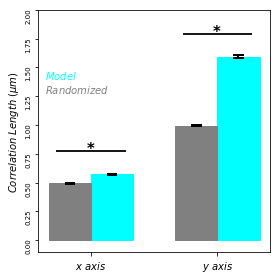

In [24]:
#Differentiated growth rate
#6.1 Use the average fraction of phi: phis[0] instead of phi

CF_x_G8=[]
CF_x_Rand=[]
phi_eff=[]

def Integration( y, dx):
    return sum(y)*dx- (y[0]+y[-1])/2*dx;

fig=plt.figure( figsize=(4, 4) );  # (width, height)
# Use the new data: 35 by 230 biofilm, new defined rho=p(on|on)- p(on|off).

files=["Bio6.1_CF-x_S{}_G8_R100Phi43Rho38_11.dat", "Bio6.1_CF_x_r3000_Rho38Sigma"+"{:.6f}_rand.dat", "Bio6.1_CF-y_S{}_G8_R100Phi43Rho38_11.dat", "Bio6.1_CF_y_r3000_Rho38Sigma"+"{:.6f}_rand.dat"]
sigmas=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
deltas=[1, 1, 2, 2]
CLs= np.zeros( (4, 10) )
for ifile in range( len(files) ):
    for isigma in range( len(sigmas) ):
        file= files[ifile]
        sigma= sigmas[isigma]
        if ifile in [0, 2]:
            covariance= np.loadtxt( "/home/xiaoling/correlated_percolation/data/"+ file.format( int(sigma*10) ) );
        else:
            covariance= np.loadtxt( "/home/xiaoling/correlated_percolation/data/"+ file.format(sigma) );
            
        covariance= np.mean( covariance, 0)    #get the average of v0vd- 0.43^2
        if ifile in [0, 2]: #use the average fraction instead of phi
            covariance= covariance+ 0.43**2- phis[0][isigma]**2       #use average phi in the sigma instead of phi
            
        covariance= covariance/ covariance[0]  #normalize    
        CLs[ifile, isigma]= Integration( covariance, deltas[ifile] )
        if ifile==0:
            CF_x_G8.append( list( covariance ) )
        elif ifile==2:
            CF_x_Rand.append( list( covariance ) )


h_x_e=np.mean( CLs[0, :] );
h_x_r=np.mean( CLs[1, :] )
h_y_e= np.mean( CLs[2, :] );
h_y_r= np.mean( CLs[3, :] );

d_x_e= np.std( CLs[0, :] )/np.sqrt( len(CLs[0, :]) )
d_x_r= np.std( CLs[1, :] )/np.sqrt( len(CLs[1, :]) )
d_y_e= np.std( CLs[2, :] )/np.sqrt( len(CLs[2, :]) )
d_y_r= np.std( CLs[3, :] )/np.sqrt( len(CLs[3, :]) )


x_e=[[2, 3, 3, 2], [0,0, h_x_e, h_x_e]];
x_r=[[1, 2, 2, 1], [0,0, h_x_r, h_x_r]];
y_e=[[5, 6, 6, 5], [0,0, h_y_e, h_y_e]];
y_r=[[4, 5, 5, 4], [0,0, h_y_r, h_y_r]];

plt.fill(x_e[0],x_e[1], color=[0, 1, 1]);
plt.fill(x_r[0],x_r[1], color=[0.5, 0.5, 0.5]);
plt.fill(y_e[0],y_e[1], color=[0, 1, 1]);
plt.fill(y_r[0],y_r[1], color=[0.5, 0.5, 0.5]);

#Start to plot the error bar
delta=0.1;
X_x_e=[ [ 2.5- delta, 2.5+ delta], [ 2.5- delta, 2.5+ delta], [2.5, 2.5]  ];
Y_x_e=[[h_x_e- d_x_e, h_x_e- d_x_e ], [ h_x_e+ d_x_e, h_x_e+ d_x_e], [ h_x_e- d_x_e, h_x_e+ d_x_e] ];

X_x_r=[ [ 1.5- delta, 1.5+ delta], [ 1.5- delta, 1.5+ delta], [1.5, 1.5]  ];
Y_x_r=[[h_x_r- d_x_r, h_x_r- d_x_r ], [ h_x_r+ d_x_r, h_x_r+ d_x_r], [ h_x_r- d_x_r, h_x_r+ d_x_r] ];

X_y_e=[ [ 5.5- delta, 5.5+ delta], [ 5.5- delta, 5.5+ delta], [5.5, 5.5]  ];
Y_y_e=[[h_y_e- d_y_e, h_y_e- d_y_e ], [ h_y_e+ d_y_e, h_y_e+ d_y_e], [ h_y_e- d_y_e, h_y_e+ d_y_e] ];

X_y_r=[ [ 4.5- delta, 4.5+ delta], [ 4.5- delta, 4.5+ delta], [4.5, 4.5]  ];
Y_y_r=[[h_y_r- d_y_r, h_y_r- d_y_r ], [ h_y_r+ d_y_r, h_y_r+ d_y_r], [ h_y_r- d_y_r, h_y_r+ d_y_r] ];

for i in range(3):
    plt.plot( X_x_e[i], Y_x_e[i], color=[0,0,0], linewidth=2);
    plt.plot( X_x_r[i], Y_x_r[i], color=[0,0,0], linewidth=2);
    plt.plot( X_y_e[i], Y_y_e[i], color=[0,0,0], linewidth=2);
    plt.plot( X_y_r[i], Y_y_r[i], color=[0,0,0], linewidth=2);

#frame=[ [4.2, 4.2, 5.8, 5.8], [h_y_r, h_y_e+ 0.2, h_y_e+0.2, h_y_e]];
frame=[ [4.2, 5.8], [ h_y_e+ 0.2, h_y_e+0.2]];
plt.plot( frame[0], frame[1],  color=[0.1,0.1,0.1], linewidth=2 )

#frame=[ [1.2, 1.2, 2.8, 2.8], [h_x_r, h_x_e+ 0.2, h_x_e+0.2, h_x_e]];
frame=[ [1.2, 2.8], [ h_x_e+ 0.2, h_x_e+0.2]];
plt.plot( frame[0], frame[1],  color=[0.1,0.1,0.1], linewidth=2 )

plt.text(0.9, 1.4, r'$Model$', fontsize=10,  color=[0, 1, 1]);
plt.text(0.9, 1.28, r'$Randomized$', fontsize=10, color=[0.5, 0.5, 0.5]);
plt.text(4.9, h_y_e+ 0.18, '*', fontsize=15, fontweight='bold',  color=[0, 0, 0]);
plt.text(1.9, h_x_e+ 0.18, '*', fontsize=15, fontweight='bold',  color=[0, 0, 0]);

plt.ylabel(r"$Correlation\ Length\ (\mu m)$", fontsize=10);
plt.xticks([2, 5], [r"$x\ axis$",r"$y\ axis$"], fontsize=10)
plt.yticks(rotation=90, fontsize=7 );


#plt.yticks(rotation=90, fontsize=7 );
plt.ylim([-0.1, 2.0])
#plt.title("Xiaoling's practice", fontsize=18)
#plt.legend([line1, line2], ['ex1','ex2'])

#plt.savefig("plot_2curves.eps", dpi=300)

#blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          #markersize=15, label='Blue stars')
#plt.legend(handles=[blue_line])

#plt.text(-0.3, 2.0, 'B', fontsize=12, fontweight='bold');

plt.tight_layout()

plt.savefig("/home/xiaoling/correlated_percolation/figures/Reviw_CL-xy_Gamma8_Rand_MPhi_v11.pdf", format='pdf');
plt.savefig("/home/xiaoling/correlated_percolation/figures/Reviw_CL-xy_Gamma8_Rand_MPhi_v11.png", dpi=600, format='png');
plt.show()

In [26]:
#in the axis x

h_x_e=np.mean( CLs[0, :] );
h_x_r=np.mean( CLs[1, :] )
h_y_e= np.mean( CLs[2, :] );
h_y_r= np.mean( CLs[3, :] );

d_x_e= np.std( CLs[0, :] )#/np.sqrt( len(CLs[0, :]) )
d_x_r= np.std( CLs[1, :] )#/np.sqrt( len(CLs[1, :]) )
d_y_e= np.std( CLs[2, :] )#/np.sqrt( len(CLs[2, :]) )
d_y_r= np.std( CLs[3, :] )#/np.sqrt( len(CLs[3, :]) )

mean_rad= h_x_r;
sigma2_rad= d_x_r**2;   #sample variance divided by sample size: the variance of u_rand~N(mean, sigma2_rand)

mean_exp=h_x_e;
sigma2_exp= d_x_e**2;
#define z= mean_rad- mean_exp: P(z>0)
u_z= mean_rad- mean_exp
sigma2_z= sigma2_rad+ sigma2_exp
sigma_z= np.sqrt( sigma2_z)
pz_larger_0= 1/2- 1/2*erf( -u_z/( np.sqrt(2) *sigma_z )  )
print(pz_larger_0)


#in the axis y
mean_rad= h_y_r;
sigma2_rad= d_y_r**2;   #sample variance divided by sample size: the variance of u_rand~N(mean, sigma2_rand)

mean_exp=h_y_e;
sigma2_exp= d_y_e**2;
#define z= mean_rad- mean_exp: P(z>0)
u_z= mean_rad- mean_exp
sigma2_z= sigma2_rad+ sigma2_exp
sigma_z= np.sqrt( sigma2_z)
pz_larger_0= 1/2- 1/2*erf( -u_z/( np.sqrt(2) *sigma_z )  )
print(pz_larger_0)

1.295911858378851e-07
0.0
